In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.utils.data as utils
from torch import optim
import torch.nn.functional as F
import os

In [14]:
class SimpleNet(nn.Module):
    def __init__(self, ni):
        super().__init__()
        self.linear1 = nn.Linear(ni, 128)
        self.linear2 = nn.Linear(128, 128)
        self.linear3 = nn.Linear(128, 64)
        self.linear4 = nn.Linear(64,64)
        self.linear5 = nn.Linear(64,1)

    def forward(self, x):
        x = F.tanh(self.linear1(x))
        x = F.tanh(self.linear2(x))
        x = F.tanh(self.linear3(x))
        x = F.tanh(self.linear4(x))
        x = self.linear5(x)
        return x


In [45]:
df = pd.read_csv("FeynmanEquations.csv")

modelo = SimpleNet(2)

modelo.load_state_dict(torch.load(f"NN_models/I.6.2/{os.listdir("NN_models/I.6.2/")[2]}")["model_state_dict"])

df

,Filename,Number,Output,Formula,# variables,v1_name,v1_low,v1_high,v2_name,v2_low,...,v7_high,v8_name,v8_low,v8_high,v9_name,v9_low,v9_high,v10_name,v10_low,v10_high
0,I.6.2a,1.0,f,exp(-theta**2/2)/sqrt(2*pi),1.0,theta,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I.6.2,2.0,f,exp(-(theta/sigma)**2/2)/(sqrt(2*pi)*sigma),2.0,sigma,1.0,3.0,theta,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I.6.2b,3.0,f,exp(-((theta-theta1)/sigma)**2/2)/(sqrt(2*pi)*...,3.0,sigma,1.0,3.0,theta,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I.8.14,4.0,d,sqrt((x2-x1)**2+(y2-y1)**2),4.0,x1,1.0,5.0,x2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I.9.18,5.0,F,G*m1*m2/((x2-x1)**2+(y2-y1)**2+(z2-z1)**2),9.0,m1,1.0,2.0,m2,1.0,...,2.0,z1,3.0,4.0,z2,1.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
txt = np.loadtxt("Feynman_with_units/I.6.2")

n_variables = txt.shape[1]-1
variables = txt[:,:-1]
f_dependent = txt[:,[-1]]
indx = np.random.permutation(len(txt))
factors = torch.from_numpy(variables)
factors = factors.float()
product = torch.from_numpy(f_dependent)
product = product.float()
modelo.eval()
torch.no_grad()

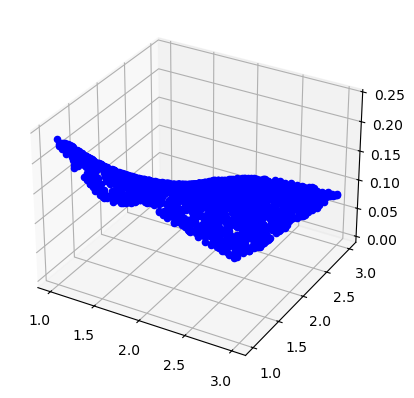

In [82]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for i in indx[:2000]:
    ax.scatter(factors[i, 0], factors[i, 1], product[i], color="blue")


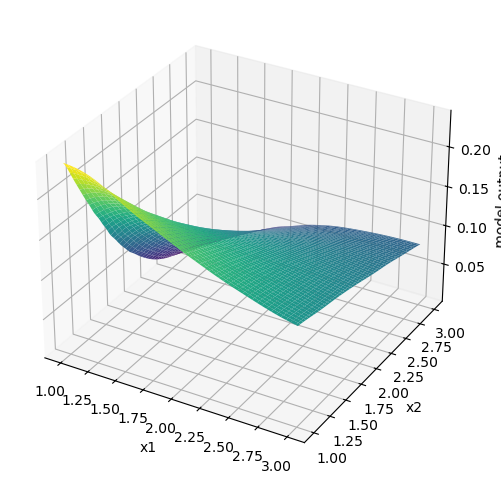

In [ ]:
#plt.plot(factors[1000:,0], product[1000:], ".")


#ax = plt.figure().add_subplot(projection='3d')

n = 100  # resolution
x1 = torch.linspace(1, 3, n)
x2 = torch.linspace(1, 3, n)

X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
grid = torch.stack([X1, X2], dim=-1)   # shape: (n, n, 2)

# evaluate model on the grid
with torch.no_grad():
    y = modelo(grid.reshape(-1, 2))  # flatten grid first
    y = y.reshape(n, n)             # reshape to grid
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1.numpy(), X2.numpy(), y.numpy(), cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('model output')

plt.show()